In [1]:
import torch
print(torch.cuda.is_available())

False


In [4]:
a = torch.FloatTensor([1, 2])
a.shape

torch.Size([2])

In [5]:
b = torch.FloatTensor([[1,2],[3,4]])
b.shape

torch.Size([2, 2])

In [35]:
c = torch.Tensor(5)
c.zero_()

tensor([0., 0., 0., 0., 0.])

In [36]:
d = torch.randn((2,3))
d

tensor([[-0.2896, -0.7552,  1.3267],
        [ 0.4893, -1.0944, -1.3181]])

In [43]:
d.view(3,2)

tensor([[-0.2896, -0.7552],
        [ 1.3267,  0.4893],
        [-1.0944, -1.3181]])

In [57]:
e = d.to(torch.int)
e

tensor([[ 0,  0,  1],
        [ 0, -1, -1]], dtype=torch.int32)

In [50]:
d

tensor([[-0.2896, -0.7552,  1.3267],
        [ 0.4893, -1.0944, -1.3181]])

In [52]:
d[0:2,1]

tensor([-0.7552, -1.0944])

In [59]:
e.sub(d)

tensor([[ 0.2896,  0.7552, -0.3267],
        [-0.4893,  0.0944,  0.3181]])

In [65]:
e[e < d]

tensor([1, 0], dtype=torch.int32)

In [68]:
d.abs()

tensor([[0.2896, 0.7552, 1.3267],
        [0.4893, 1.0944, 1.3181]])

In [75]:
d.sum(dim=0)

tensor([ 0.1997, -1.8496,  0.0086])

In [76]:
d.shape

torch.Size([2, 3])

In [79]:
d[:,None, :].shape

torch.Size([2, 1, 3])

In [87]:
def vertical_means(A):
    result = A.mean(dim=0)
    return result

A = torch.Tensor([[1,4],
                  [2,7]])

vertical_means(A)

tensor([1.5000, 5.5000])

In [99]:
def normalise_pictures(A):

    mean = A.mean(dim=(2,3))
    sigma = A.std(dim=(2,3))
    result = (A - mean[:,:,None,None])/sigma[:,:,None,None]
    return result

batch = torch.randint(0, 256, (64, 3, 300, 300), dtype=torch.float32)
batch.mean(dim=(2,3)).shape
B = normalise_pictures(batch)
B.std(dim=(2,3))

tensor([[1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000],
        [1.000

In [112]:
a = torch.FloatTensor([1,2,3,4,5,6])
b = torch.FloatTensor([-1,-2,-3,-4,-5,-6])
a.dot(b)

tensor(-91.)

In [117]:
a = torch.FloatTensor([[1,2],[3,4]])
b = torch.FloatTensor([[-1,-2],[-3,-4]])
a.mm(b)

tensor([[ -7., -10.],
        [-15., -22.]])

In [124]:
a.mv(torch.FloatTensor([1,2]))

tensor([ 5., 11.])

In [134]:
def forward_pass(X, w):
    logits = X @ w
    result = torch.sigmoid(logits)
    return result


X = torch.FloatTensor([[-5,5], [2,3], [1,-1]])
print(X.shape)
w = torch.FloatTensor([[-0.5], [2.5]])
print(w.shape)
result = forward_pass(X,w)
print(f"result: {result}")

torch.Size([3, 2])
torch.Size([2, 1])
result: tensor([[1.0000],
        [0.9985],
        [0.0474]])


In [19]:
f = torch.FloatTensor(1024, 1024).uniform_(0,1)
f

tensor([[0.0172, 0.8271, 0.5043,  ..., 0.8150, 0.7046, 0.0672],
        [0.2913, 0.2534, 0.2956,  ..., 0.3866, 0.7992, 0.0622],
        [0.0453, 0.1258, 0.3264,  ..., 0.1047, 0.3665, 0.6272],
        ...,
        [0.2014, 0.8985, 0.2481,  ..., 0.8637, 0.1146, 0.9268],
        [0.4167, 0.1486, 0.2956,  ..., 0.3443, 0.6838, 0.1998],
        [0.4749, 0.6097, 0.7994,  ..., 0.4945, 0.7724, 0.4578]])

In [20]:
f.is_cuda

False

In [6]:
!nvidia-smi

Tue Sep 26 20:57:08 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 536.99                 Driver Version: 536.99       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1660 Ti   WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   55C    P0              20W /  80W |      0MiB /  6144MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [23]:
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

In [26]:
f = f.to(device)
f.is_cpu

True

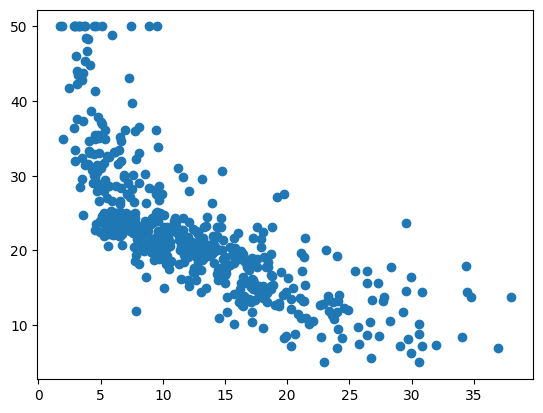

In [12]:
import matplotlib.pyplot as plt
import torch
%matplotlib inline

import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

plt.scatter(data[:,-1], target)
# print(data[:,0].shape)
# print(target.shape)

In [16]:
w = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
x = torch.tensor(data[:,1] / 10, dtype=torch.float32)
y = torch.tensor(target, dtype=torch.float32)

y_pred = w*x + b
loss = torch.mean((y_pred - y)**2)

loss.backward()

print("dL/dw =", w.grad)
print("dL/db =", b.grad)

dL/dw = tensor([-66.6434])
dL/db = tensor([-45.0656])


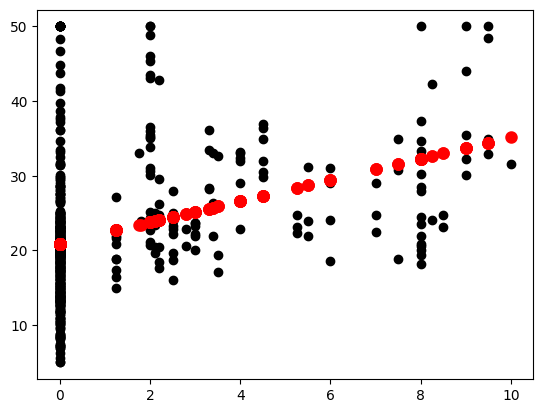

tensor(73.4517, grad_fn=<MeanBackward0>)


In [17]:
from IPython.display import clear_output
learning_rate = 0.05

for i in range(100):
    y_pred = w*x + b
    loss = torch.mean((y_pred - y)**2)
    loss.backward()
    w.data -= learning_rate*w.grad.data
    b.data -= learning_rate*b.grad.data

    w.grad.data.zero_()
    b.grad.data.zero_()

    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy(), color='black')
        plt.scatter(x.data.numpy(), y_pred.data.numpy(), color='red', linewidths=3)

        plt.show()
        print(loss)

In [18]:
import torch

